In [32]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

%matplotlib inline
%jsroot on

In [33]:
positron_features_data = pd.read_pickle("new_combined_data_positron_features_82.pkl")
positron_features_data

,beamEnergy,trueBeamEnergy,features_82
71746,20.0,20.000000,"[19.620185911655426, 42.86726224422455, 81.833..."
258314,100.0,99.830002,"[19.80180013179779, 111.67931747436523, 307.72..."
18871,20.0,20.000000,"[31.33267619460821, 80.87321257591248, 191.973..."
127926,50.0,49.990002,"[14.808391571044922, 67.0694465637207, 123.298..."
79205,20.0,20.000000,"[7.694568514823914, 43.950953245162964, 61.200..."
...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127..."
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84..."
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79..."
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3..."


In [34]:
positron_features_data.loc[(positron_features_data.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy
count,99006.0,99006.0
mean,20.0,20.0
std,0.0,0.0
min,20.0,20.0
25%,20.0,20.0
50%,20.0,20.0
75%,20.0,20.0
max,20.0,20.0


In [35]:
def lay_data(df):
    return df.features_82[:28]

def features(df):
    return np.array(list(df.features_82[:28]) + list(df.features_82[79:80]))

In [36]:
positron_features_data["features"] = positron_features_data.apply(features, axis=1)
positron_features_data

,beamEnergy,trueBeamEnergy,features_82,features
71746,20.0,20.000000,"[19.620185911655426, 42.86726224422455, 81.833...","[19.620185911655426, 42.86726224422455, 81.833..."
258314,100.0,99.830002,"[19.80180013179779, 111.67931747436523, 307.72...","[19.80180013179779, 111.67931747436523, 307.72..."
18871,20.0,20.000000,"[31.33267619460821, 80.87321257591248, 191.973...","[31.33267619460821, 80.87321257591248, 191.973..."
127926,50.0,49.990002,"[14.808391571044922, 67.0694465637207, 123.298...","[14.808391571044922, 67.0694465637207, 123.298..."
79205,20.0,20.000000,"[7.694568514823914, 43.950953245162964, 61.200...","[7.694568514823914, 43.950953245162964, 61.200..."
...,...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127...","[21.99822837114334, 96.83178961277008, 274.127..."
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84...","[24.746097564697266, 70.07785701751709, 225.84..."
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79...","[9.173689126968384, 29.458719730377197, 129.79..."
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3...","[35.232404470443726, 100.07887268066406, 326.3..."


In [37]:
positron_features_data.features[0]

array([4.25528321e+01, 5.96219341e+01, 1.63415781e+02, 1.59849736e+02,
       2.06937559e+02, 1.68823215e+02, 1.72250744e+02, 2.38102072e+02,
       1.96959771e+02, 1.78784442e+02, 1.52710185e+02, 1.01558648e+02,
       7.33484479e+01, 4.13116891e+01, 4.37961568e+01, 1.88428114e+01,
       1.48908845e+01, 6.13145964e+01, 0.00000000e+00, 0.00000000e+00,
       9.85744357e+00, 2.41166902e+00, 1.09807837e+00, 1.28980708e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.10972850e+03])

In [38]:
X_train = np.stack(positron_features_data.head(450000).features.values)
X_train.shape

(450000, 29)

In [39]:
from sklearn import preprocessing

In [40]:
X = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X

array([[-0.6049475 , -0.91895288, -1.08316388, ..., -0.56598502,
        -0.51777978, -1.09239364],
       [-0.59692286,  0.19421155,  0.3901832 , ..., -0.29203872,
        -0.22507084, -0.31904963],
       [-0.08743029, -0.30413515, -0.36479939, ..., -0.56598502,
        -0.51777978, -1.12010859],
       ...,
       [-1.19946528, -1.41478021, -1.42393691, ..., -0.56598502,
        -0.51777978, -1.10308247],
       [-1.00167225, -1.10265791, -0.61193604, ...,  0.92006907,
         0.22413291,  1.69945898],
       [-0.14319998,  0.67498755,  0.72641241, ...,  1.54177187,
        -0.13766139,  1.69060411]])

In [41]:
Y = positron_features_data.head(450000).trueBeamEnergy.values
print(Y)
Y.shape

[ 20.    99.83  20.   ...  20.   287.18 287.18]


(450000,)

In [42]:
from tensorflow.python import keras
import neptune
from neptunecontrib.monitoring.keras import NeptuneMonitor
from keras.utils.vis_utils import plot_model

In [43]:


    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 100,
              'batch_size': 64,
              'optimizer':"adam",
              'activation':"ReLU",
              'lr': 0.0000327377,
              'units_per_layer': 1024,
              'num_hidden_layers': 1,
              'dropout': 0.0359144,
              'loss_fuc': "mse",
              'val_splip':0.2,
              'particle':"positron"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[29], activation="relu"),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu) 
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-170
Epoch 1/100
5625/5625 [==============================] - 11s 2ms/step - loss: 8137.5049 - val_loss: 2103.4666
Epoch 2/100
5625/5625 [==============================] - 11s 2ms/step - loss: 1451.1377 - val_loss: 1037.4475
Epoch 3/100
5625/5625 [==============================] - 11s 2ms/step - loss: 737.4548 - val_loss: 411.9391
Epoch 4/100
5625/5625 [==============================] - 11s 2ms/step - loss: 206.7793 - val_loss: 70.1801
Epoch 5/100
5625/5625 [==============================] - 11s 2ms/step - loss: 39.1929 - val_loss: 20.5167
Epoch 6/100
5625/5625 [==============================] - 10s 2ms/step - loss: 20.3847 - val_loss: 15.8332
Epoch 7/100
5625/5625 [==============================] - 10s 2ms/step - loss: 17.7179 - val_loss: 14.6849
Epoch 8/100
5625/5625 [==============================] - 10s 2ms/step - loss: 16.7667 - val_loss: 14.1417
Epoch 9/100
5625/5625 [==============================] - 11s 2ms/step - loss: 16.2031

5625/5625 [==============================] - 10s 2ms/step - loss: 13.6551 - val_loss: 12.1379
Epoch 75/100
5625/5625 [==============================] - 10s 2ms/step - loss: 13.6469 - val_loss: 12.0940
Epoch 76/100
5625/5625 [==============================] - 10s 2ms/step - loss: 13.6395 - val_loss: 12.1082
Epoch 77/100
5625/5625 [==============================] - 10s 2ms/step - loss: 13.6191 - val_loss: 12.1888
Epoch 78/100
5625/5625 [==============================] - 10s 2ms/step - loss: 13.6176 - val_loss: 12.0686
Epoch 79/100
5625/5625 [==============================] - 10s 2ms/step - loss: 13.6362 - val_loss: 12.0349
Epoch 80/100
5625/5625 [==============================] - 9s 2ms/step - loss: 13.5664 - val_loss: 12.0067
Epoch 81/100
5625/5625 [==============================] - 10s 2ms/step - loss: 13.5858 - val_loss: 11.9816
Epoch 82/100
5625/5625 [==============================] - 10s 2ms/step - loss: 13.5311 - val_loss: 12.0019
Epoch 83/100
5625/5625 [===========================

2021-01-31 19:24:30.374567: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 104400000 exceeds 10% of free system memory.
2021-01-31 19:24:30.589061: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 83520000 exceeds 10% of free system memory.


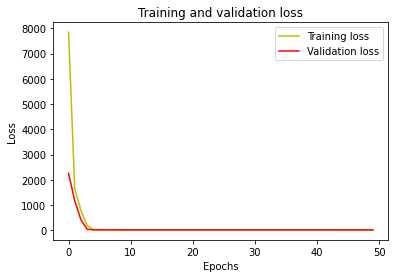

In [13]:
l = history.history['loss']
vl = history.history['val_loss']

epochs = range( len(l) )
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
units_per_lay=[256, 512, 1024]

b_size = [32, 64, 128]

np.random.randint(4)

3

In [15]:
lr = np.exp(-np.random.uniform(7, 13, 10))
dropout = np.random.uniform(0, 0.05, 10)

units_per_layer = [units_per_lay[np.random.randint(3)] for i in range(10)]
batch_size = [b_size[np.random.randint(3)] for i in range(10)]

print(lr)
print(dropout)
print(units_per_layer)
print(batch_size)

[8.95233528e-04 3.27376643e-05 7.85191817e-04 6.91546797e-06
 7.71746287e-06 7.29673237e-05 5.26224811e-06 8.98586213e-04
 1.30484255e-05 4.97299109e-04]
[0.02390747 0.03591443 0.0195433  0.03138854 0.03946705 0.03295062
 0.00883918 0.01544213 0.03384591 0.02865526]
[512, 1024, 512, 1024, 1024, 1024, 512, 1024, 1024, 512]
[64, 64, 32, 128, 64, 32, 32, 128, 64, 64]


In [16]:
train_loss=[]
val_loss=[]

for i in range(10):

    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 50,
              'batch_size': batch_size[i],
              'optimizer':"adam",
              'activation':"relu",
              'lr': lr[i],
              'units_per_layer': units_per_layer[i],
              'num_hidden_layers': 1,
              'dropout': dropout[i],
              'loss_fuc': "mse",
              'particle':"positron"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[29], activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu)
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])
    
    l = history.history['loss']
    vl = history.history['val_loss']
    train_loss.append(l)
    val_loss.append(vl)
    
    print(i+1)

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-149
Epoch 1/50
5625/5625 [==============================] - 9s 2ms/step - loss: 24714.0547 - val_loss: 24602.5586
Epoch 2/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0859 - val_loss: 24602.5586
Epoch 3/50
5625/5625 [==============================] - 8s 1ms/step - loss: 24709.0781 - val_loss: 24602.5586
Epoch 4/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0566 - val_loss: 24602.5586
Epoch 5/50
5625/5625 [==============================] - 8s 1ms/step - loss: 24709.0742 - val_loss: 24602.5586
Epoch 6/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0879 - val_loss: 24602.5586
Epoch 7/50
5625/5625 [==============================] - 8s 1ms/step - loss: 24709.0840 - val_loss: 24602.5586
Epoch 8/50
5625/5625 [==============================] - 9s 2ms/step - loss: 24709.0605 - val_loss: 24602.5586
Epoch 9/50
5625/5625 [==============================] - 8s 1ms/s

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-150
Epoch 1/50
5625/5625 [==============================] - 13s 2ms/step - loss: 13076.4883 - val_loss: 1101.0532
Epoch 2/50
5625/5625 [==============================] - 10s 2ms/step - loss: 6186.2671 - val_loss: 24.0856
Epoch 3/50
5625/5625 [==============================] - 11s 2ms/step - loss: 1775.5803 - val_loss: 108.1682
Epoch 4/50
5625/5625 [==============================] - 11s 2ms/step - loss: 327.0672 - val_loss: 24.2337
Epoch 5/50
5625/5625 [==============================] - 10s 2ms/step - loss: 54.3885 - val_loss: 18.7619
Epoch 6/50
5625/5625 [==============================] - 12s 2ms/step - loss: 23.8773 - val_loss: 14.8035
Epoch 7/50
5625/5625 [==============================] - 10s 2ms/step - loss: 20.3758 - val_loss: 14.7977
Epoch 8/50
5625/5625 [==============================] - 10s 2ms/step - loss: 19.2748 - val_loss: 14.2780
Epoch 9/50
5625/5625 [==============================] - 11s 2ms/step - loss: 18.7426 - val_lo

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-151
Epoch 1/50
11250/11250 [==============================] - 13s 1ms/step - loss: 24709.7324 - val_loss: 24602.5527
Epoch 2/50
11250/11250 [==============================] - 12s 1ms/step - loss: 24709.0977 - val_loss: 24602.5527
Epoch 3/50
11250/11250 [==============================] - 12s 1ms/step - loss: 24709.0488 - val_loss: 24602.5527
Epoch 4/50
11250/11250 [==============================] - 11s 1ms/step - loss: 24709.1152 - val_loss: 24602.5527
Epoch 5/50
11250/11250 [==============================] - 11s 999us/step - loss: 24709.1055 - val_loss: 24602.5527
Epoch 6/50
11250/11250 [==============================] - 11s 1ms/step - loss: 24709.0469 - val_loss: 24602.5527
Epoch 7/50
11250/11250 [==============================] - 11s 975us/step - loss: 24709.0625 - val_loss: 24602.5527
Epoch 8/50
11250/11250 [==============================] - 12s 1ms/step - loss: 24709.0488 - val_loss: 24602.5527
Epoch 9/50
11250/11250 [============

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-152
Epoch 1/50
2813/2813 [==============================] - 8s 3ms/step - loss: 12830.5947 - val_loss: 1668.8850
Epoch 2/50
2813/2813 [==============================] - 7s 2ms/step - loss: 11686.2305 - val_loss: 1641.9469
Epoch 3/50
2813/2813 [==============================] - 7s 2ms/step - loss: 10540.1924 - val_loss: 530.3519
Epoch 4/50
2813/2813 [==============================] - 7s 2ms/step - loss: 9499.8145 - val_loss: 124.8428
Epoch 5/50
2813/2813 [==============================] - 7s 2ms/step - loss: 8356.4697 - val_loss: 123.4240
Epoch 6/50
2813/2813 [==============================] - 7s 2ms/step - loss: 7290.0366 - val_loss: 125.7717
Epoch 7/50
2813/2813 [==============================] - 7s 2ms/step - loss: 6247.3159 - val_loss: 35.3153
Epoch 8/50
2813/2813 [==============================] - 7s 2ms/step - loss: 5253.7534 - val_loss: 36.4942
Epoch 9/50
2813/2813 [==============================] - 7s 2ms/step - loss: 4310.4771

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-153
Epoch 1/50
5625/5625 [==============================] - 12s 2ms/step - loss: 17472.3633 - val_loss: 2530.6135
Epoch 2/50
5625/5625 [==============================] - 10s 2ms/step - loss: 12118.3662 - val_loss: 2009.7441
Epoch 3/50
5625/5625 [==============================] - 10s 2ms/step - loss: 10210.2979 - val_loss: 225.2446
Epoch 4/50
5625/5625 [==============================] - 10s 2ms/step - loss: 8074.1562 - val_loss: 173.3695
Epoch 5/50
5625/5625 [==============================] - 10s 2ms/step - loss: 6020.0898 - val_loss: 58.1364
Epoch 6/50
5625/5625 [==============================] - 10s 2ms/step - loss: 4161.8906 - val_loss: 21.8851
Epoch 7/50
5625/5625 [==============================] - 10s 2ms/step - loss: 2688.2388 - val_loss: 37.7789
Epoch 8/50
5625/5625 [==============================] - 10s 2ms/step - loss: 1602.6212 - val_loss: 24.1272
Epoch 9/50
5625/5625 [==============================] - 10s 2ms/step - loss: 89

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-154
Epoch 1/50
11250/11250 [==============================] - 16s 1ms/step - loss: 5861.4858 - val_loss: 72.1638
Epoch 2/50
11250/11250 [==============================] - 15s 1ms/step - loss: 141.7088 - val_loss: 26.7578
Epoch 3/50
11250/11250 [==============================] - 14s 1ms/step - loss: 21.1249 - val_loss: 17.4807
Epoch 4/50
11250/11250 [==============================] - 15s 1ms/step - loss: 19.7302 - val_loss: 14.4049
Epoch 5/50
11250/11250 [==============================] - 14s 1ms/step - loss: 19.3330 - val_loss: 13.7736
Epoch 6/50
11250/11250 [==============================] - 17s 1ms/step - loss: 19.1300 - val_loss: 13.7416
Epoch 7/50
11250/11250 [==============================] - 15s 1ms/step - loss: 19.0801 - val_loss: 13.5625
Epoch 8/50
11250/11250 [==============================] - 15s 1ms/step - loss: 18.9812 - val_loss: 15.2245
Epoch 9/50
11250/11250 [==============================] - 15s 1ms/step - loss: 19.192

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-155
Epoch 1/50
11250/11250 [==============================] - 12s 1ms/step - loss: 24709.1621 - val_loss: 24602.5527
Epoch 2/50
11250/11250 [==============================] - 11s 999us/step - loss: 24709.1484 - val_loss: 24602.5527
Epoch 3/50
11250/11250 [==============================] - 11s 1ms/step - loss: 24709.1035 - val_loss: 24602.5527
Epoch 4/50
11250/11250 [==============================] - 11s 1ms/step - loss: 9404.7676 - val_loss: 183.1266
Epoch 5/50
11250/11250 [==============================] - 11s 1ms/step - loss: 6668.3115 - val_loss: 140.9469
Epoch 6/50
11250/11250 [==============================] - 11s 1ms/step - loss: 5933.4004 - val_loss: 128.6510
Epoch 7/50
11250/11250 [==============================] - 11s 1ms/step - loss: 5320.0122 - val_loss: 155.6512
Epoch 8/50
11250/11250 [==============================] - 11s 1ms/step - loss: 4704.4390 - val_loss: 185.8206
Epoch 9/50
11250/11250 [=============================

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-156
Epoch 1/50
2813/2813 [==============================] - 8s 3ms/step - loss: 24718.8535 - val_loss: 24602.5352
Epoch 2/50
2813/2813 [==============================] - 7s 3ms/step - loss: 24709.1094 - val_loss: 24602.5352
Epoch 3/50
2813/2813 [==============================] - 7s 2ms/step - loss: 24709.0547 - val_loss: 24602.5352
Epoch 4/50
2813/2813 [==============================] - 7s 3ms/step - loss: 24709.0508 - val_loss: 24602.5352
Epoch 5/50
2813/2813 [==============================] - 7s 2ms/step - loss: 24709.1035 - val_loss: 24602.5352
Epoch 6/50
2813/2813 [==============================] - 7s 2ms/step - loss: 24709.0977 - val_loss: 24602.5352
Epoch 7/50
2813/2813 [==============================] - 7s 2ms/step - loss: 24709.0781 - val_loss: 24602.5352
Epoch 8/50
2813/2813 [==============================] - 7s 2ms/step - loss: 24709.0977 - val_loss: 24602.5352
Epoch 9/50
2813/2813 [==============================] - 7s 2ms/s

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-157
Epoch 1/50
5625/5625 [==============================] - 12s 2ms/step - loss: 11405.7852 - val_loss: 208.4136
Epoch 2/50
5625/5625 [==============================] - 10s 2ms/step - loss: 8316.2578 - val_loss: 339.6423
Epoch 3/50
5625/5625 [==============================] - 10s 2ms/step - loss: 5492.1475 - val_loss: 39.0783
Epoch 4/50
5625/5625 [==============================] - 10s 2ms/step - loss: 3148.8992 - val_loss: 26.5081
Epoch 5/50
5625/5625 [==============================] - 10s 2ms/step - loss: 1559.6542 - val_loss: 21.0573
Epoch 6/50
5625/5625 [==============================] - 10s 2ms/step - loss: 690.9623 - val_loss: 27.6801
Epoch 7/50
5625/5625 [==============================] - 10s 2ms/step - loss: 277.1834 - val_loss: 20.3882
Epoch 8/50
5625/5625 [==============================] - 10s 2ms/step - loss: 104.8090 - val_loss: 18.5307
Epoch 9/50
5625/5625 [==============================] - 10s 2ms/step - loss: 45.2960 - v

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-158
Epoch 1/50
5625/5625 [==============================] - 8s 1ms/step - loss: 24741.3867 - val_loss: 24602.5586
Epoch 2/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0918 - val_loss: 24602.5586
Epoch 3/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0605 - val_loss: 24602.5586
Epoch 4/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.1348 - val_loss: 24602.5586
Epoch 5/50
5625/5625 [==============================] - 8s 1ms/step - loss: 24709.0684 - val_loss: 24602.5586
Epoch 6/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0742 - val_loss: 24602.5586
Epoch 7/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0723 - val_loss: 24602.5586
Epoch 8/50
5625/5625 [==============================] - 7s 1ms/step - loss: 24709.0723 - val_loss: 24602.5586
Epoch 9/50
5625/5625 [==============================] - 7s 1ms/s

2021-01-29 20:13:02.628519: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-29 20:13:02.660647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-29 20:13:02.661006: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-01-29 20:13:02.661158: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nitish/Root/lib:/home/nitish/Root/lib/:
2021-01-29 20:13:02.661276: W tensorflow/stream_executor/platfor

In [ ]:
n=0
l = train_loss[n-1]
vl = val_loss[n-1]

l = history.history['loss']
vl = history.history['val_loss']

epochs = range(1, len(l) + 1)
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
x_test_set = positron_features_data.tail(497521-450000)
x_test_set

,beamEnergy,trueBeamEnergy,features_82,features
140083,50.0,49.990002,"[36.1808198094368, 112.05515432357788, 344.055...","[36.1808198094368, 112.05515432357788, 344.055..."
176266,50.0,49.990002,"[27.644265174865723, 89.75948238372803, 181.27...","[27.644265174865723, 89.75948238372803, 181.27..."
467591,300.0,287.179993,"[5.341816544532776, 10.147825479507446, 50.193...","[5.341816544532776, 10.147825479507446, 50.193..."
315954,200.0,197.320007,"[47.18856540322304, 226.70562952756882, 514.61...","[47.18856540322304, 226.70562952756882, 514.61..."
392015,300.0,287.179993,"[24.764533758163452, 93.55589425563812, 260.57...","[24.764533758163452, 93.55589425563812, 260.57..."
...,...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127...","[21.99822837114334, 96.83178961277008, 274.127..."
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84...","[24.746097564697266, 70.07785701751709, 225.84..."
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79...","[9.173689126968384, 29.458719730377197, 129.79..."
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3...","[35.232404470443726, 100.07887268066406, 326.3..."


In [45]:
X_testp = np.stack(positron_features_data.tail(497521-450000).features.values)
X_testp.shape

(47521, 29)

In [46]:
X_test = preprocessing.StandardScaler().fit(X_train).transform(X_testp)
X_test

array([[ 0.12678527,  0.20029142,  0.62711254, ..., -0.56598502,
        -0.51777978, -0.79056244],
       [-0.250403  , -0.16038302, -0.43460641, ..., -0.44844597,
        -0.37825808, -0.75943239],
       [-1.23583826, -1.44825132, -1.28952299, ...,  0.97980065,
         1.31397277,  1.64277906],
       ...,
       [-1.0665267 , -1.13586128, -0.77034148, ...,  1.93559293,
         0.96755126,  1.62716388],
       [ 0.08487947,  0.00655253,  0.51173986, ...,  0.73611661,
         0.18918785,  1.72593166],
       [ 0.33114313,  0.21064424,  0.93858763, ...,  0.16946247,
        -0.39138249,  0.73816689]])

In [47]:
x_test_set["predicted_energy"] = model.predict(X_test)
x_test_set

<ipython-input-47-ef7fa7c5f07b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_set["predicted_energy"] = model.predict(X_test)


,beamEnergy,trueBeamEnergy,features_82,features,predicted_energy
140083,50.0,49.990002,"[36.1808198094368, 112.05515432357788, 344.055...","[36.1808198094368, 112.05515432357788, 344.055...",48.735519
176266,50.0,49.990002,"[27.644265174865723, 89.75948238372803, 181.27...","[27.644265174865723, 89.75948238372803, 181.27...",51.353432
467591,300.0,287.179993,"[5.341816544532776, 10.147825479507446, 50.193...","[5.341816544532776, 10.147825479507446, 50.193...",282.714355
315954,200.0,197.320007,"[47.18856540322304, 226.70562952756882, 514.61...","[47.18856540322304, 226.70562952756882, 514.61...",193.036407
392015,300.0,287.179993,"[24.764533758163452, 93.55589425563812, 260.57...","[24.764533758163452, 93.55589425563812, 260.57...",286.620605
...,...,...,...,...,...
196232,100.0,99.830002,"[21.99822837114334, 96.83178961277008, 274.127...","[21.99822837114334, 96.83178961277008, 274.127...",102.173096
225431,100.0,99.830002,"[24.746097564697266, 70.07785701751709, 225.84...","[24.746097564697266, 70.07785701751709, 225.84...",100.458229
428402,300.0,287.179993,"[9.173689126968384, 29.458719730377197, 129.79...","[9.173689126968384, 29.458719730377197, 129.79...",282.708435
419756,300.0,287.179993,"[35.232404470443726, 100.07887268066406, 326.3...","[35.232404470443726, 100.07887268066406, 326.3...",288.381653


In [18]:
x_test_set.loc[(x_test_set.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9898.0,9898.0,9898.000000
mean,20.0,20.0,20.221668
std,0.0,0.0,1.267915
min,20.0,20.0,9.272890
25%,20.0,20.0,19.645592
50%,20.0,20.0,20.285103
75%,20.0,20.0,20.936453
max,20.0,20.0,26.221361


In [19]:
x_test_set.loc[(x_test_set.beamEnergy==50)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9872.0,9872.000000,9872.000000
mean,50.0,49.989994,49.915253
std,0.0,0.000000,2.183282
min,50.0,49.990002,11.088773
25%,50.0,49.990002,48.828558
50%,50.0,49.990002,50.022339
75%,50.0,49.990002,51.198526
max,50.0,49.990002,60.899170


In [20]:
x_test_set.loc[(x_test_set.beamEnergy==100)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9797.0,9797.000000,9797.000000
mean,100.0,99.830002,99.761101
std,0.0,0.000000,2.225942
min,100.0,99.830002,19.135828
25%,100.0,99.830002,98.550072
50%,100.0,99.830002,99.854187
75%,100.0,99.830002,101.095116
max,100.0,99.830002,118.814690


In [21]:
x_test_set.loc[(x_test_set.beamEnergy==200)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9926.0,9926.000000,9926.000000
mean,200.0,197.320038,197.762314
std,0.0,0.000000,4.251892
min,200.0,197.320007,85.423187
25%,200.0,197.320007,195.509018
50%,200.0,197.320007,197.965942
75%,200.0,197.320007,200.283375
max,200.0,197.320007,212.418518


In [22]:
x_test_set.loc[(x_test_set.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,8028.0,8028.000000,8028.000000
mean,300.0,287.179932,286.678070
std,0.0,0.000000,6.137374
min,300.0,287.179993,11.173366
25%,300.0,287.179993,284.610527
50%,300.0,287.179993,287.124237
75%,300.0,287.179993,289.453125
max,300.0,287.179993,305.520569


In [48]:
x_test_means = np.array([20.086958, 49.922180, 99.740166, 196.612122, 285.945129])
x_test_stds = np.array([1.518198, 2.146444, 2.697989, 4.219637, 6.722548])

resolution = x_test_stds/x_test_means
resolution

array([0.07558128, 0.0429958 , 0.02705018, 0.02146173, 0.02350992])

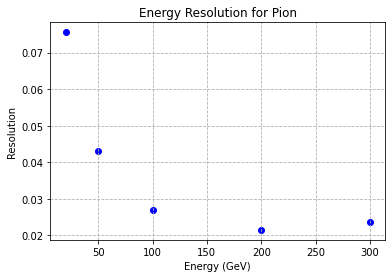

In [24]:
energy=[20, 50, 100, 200, 300]
plt.scatter(energy, resolution, color="blue")
plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Energy Resolution for Pion" )
plt.grid(linestyle='--')
plt.show()

In [49]:
energy=[20, 50, 100, 200, 300]
pred_energy_positron = []

for i in energy:
    pred_energy_positron.append(x_test_set.loc[x_test_set.beamEnergy==i].predicted_energy.values)
    
pred_energy_positron

[array([19.905298, 20.288073, 19.076616, ..., 20.343235, 20.959093,
        19.71147 ], dtype=float32),
 array([48.73552 , 51.35343 , 50.93616 , ..., 49.55342 , 49.274338,
        49.093422], dtype=float32),
 array([ 97.9053  ,  96.72566 , 102.030334, ...,  99.84974 , 102.173096,
        100.45823 ], dtype=float32),
 array([193.0364 , 192.12825, 195.29248, ..., 200.72864, 193.47314,
        195.50737], dtype=float32),
 array([282.71436, 286.6206 , 283.94214, ..., 278.3205 , 282.70844,
        288.38165], dtype=float32)]

In [50]:
%jsroot on
c = ROOT.TCanvas()

H_positron_pred_20 = ROOT.TH1F("H_positron_pred_20","Reconstructed Energy Distribution (pion);Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_50 = ROOT.TH1F("H_positron_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_100 = ROOT.TH1F("H_positron_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_200 = ROOT.TH1F("H_positron_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_300 = ROOT.TH1F("H_positron_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_positron[0].size):
    H_positron_pred_20.Fill(pred_energy_positron[0][i])
    
for i in range(pred_energy_positron[1].size):
    H_positron_pred_50.Fill(pred_energy_positron[1][i])
    
for i in range(pred_energy_positron[2].size):
    H_positron_pred_100.Fill(pred_energy_positron[2][i])
    
for i in range(pred_energy_positron[3].size):
    H_positron_pred_200.Fill(pred_energy_positron[3][i])
    
for i in range(pred_energy_positron[4].size):
    H_positron_pred_300.Fill(pred_energy_positron[4][i])
    


H_positron_pred_20.SetLineColor(1)
H_positron_pred_50.SetLineColor(2)
H_positron_pred_100.SetLineColor(3)
H_positron_pred_200.SetLineColor(4)
H_positron_pred_300.SetLineColor(5)




H_positron_pred_20.Draw()
H_positron_pred_50.Draw('same')
H_positron_pred_100.Draw('same')
H_positron_pred_200.Draw('same')
H_positron_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_50 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_300 (Potential memory leak).


In [52]:
positron_means = []
positron_stds = []

positron_means.append(H_positron_pred_20.GetMean())
positron_means.append(H_positron_pred_50.GetMean())
positron_means.append(H_positron_pred_100.GetMean())
positron_means.append(H_positron_pred_200.GetMean())
positron_means.append(H_positron_pred_300.GetMean())

positron_stds.append(H_positron_pred_20.GetStdDev())
positron_stds.append(H_positron_pred_50.GetStdDev())
positron_stds.append(H_positron_pred_100.GetStdDev())
positron_stds.append(H_positron_pred_200.GetStdDev())
positron_stds.append(H_positron_pred_300.GetStdDev())

print(positron_means)
print(positron_stds)


[20.086957226235064, 49.922181910401996, 99.7401619084066, 196.6121122708802, 285.94513352902067]
[1.5181208673592859,
 2.14633560656644,
 2.6978508393761387,
 4.219424124263639,
 6.722128983174969]



[20.0331522229465, 49.72268046344505, 99.75068570030238, 197.65538106223113, 286.8541078020461]
[1.49291195863128, 1.9350076512105547, 1.974375446524612, 4.0041688179249215, 6.460339543459435]


[1.5181208673592859,
 2.14633560656644,
 2.6978508393761387,
 4.219424124263639,
 6.722128983174969]

In [29]:
#for Normal Equation
mean_ne = [19.737455197610522, 49.828752988885135, 99.79333515123578, 197.13848975703655, 287.1216811560381]
std_ne = [1.8781667573602856, 2.2716709161722064, 2.8803391464387085, 4.154039203975118, 6.457461325058843]

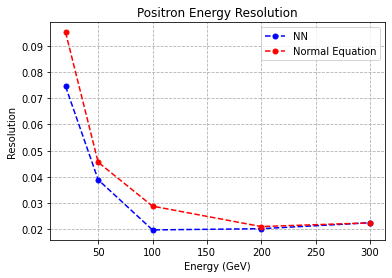

In [53]:
plt.plot(energy, np.array(positron_stds)/np.array(positron_means), "b.",  linestyle="--", label="NN", color="b", markersize=10)
plt.plot(energy, np.array(std_ne)/np.array(mean_ne), "r.",  linestyle="--", label="Normal Equation",color="r", markersize=10)


plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Positron Energy Resolution")

#plt.ylim([0.01,.1])

plt.grid(linestyle='--')
plt.legend()
plt.show()

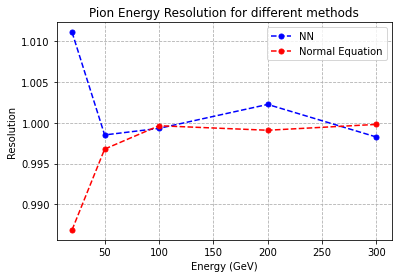

In [31]:
true_energy = np.array([20, 49.989998, 99.829994, 197.320053, 287.179962])

plt.plot(energy, np.array(positron_means)/true_energy, "b.", label="NN",  linestyle="--", color="b", markersize=10)
plt.plot(energy, np.array(mean_ne)/true_energy, "r.", label="Normal Equation",  linestyle="--", color="r", markersize=10)


plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

#plt.ylim([0.9,1.1])

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [41]:
import keras.backend as K

In [44]:
def loss(y_true,y_pred):
    return K.mean(K.square(y_pred - y_true) /(y_true*y_true))

In [48]:


    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 50,
              'batch_size': 64,
              'optimizer':"adam",
              'activation':"ReLU",
              'lr': 0.0000327377,
              'units_per_layer': 1024,
              'num_hidden_layers': 1,
              'dropout': 0.0359144,
              'loss_fuc': "mse/y_treu_squ",
              'val_splip':0.2,
              'particle':"positron"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[29], activation="relu"),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu) 
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=loss)
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-164
Epoch 1/50
5625/5625 [==============================] - 12s 2ms/step - loss: 101994.3125 - val_loss: 3729.0952
Epoch 2/50
5625/5625 [==============================] - 10s 2ms/step - loss: 39097.3164 - val_loss: 438.5524
Epoch 3/50
5625/5625 [==============================] - 11s 2ms/step - loss: 9007.0752 - val_loss: 311.7447
Epoch 4/50
5625/5625 [==============================] - 10s 2ms/step - loss: 1380.2484 - val_loss: 246.6182
Epoch 5/50
5625/5625 [==============================] - 11s 2ms/step - loss: 309.9376 - val_loss: 157.7444
Epoch 6/50
5625/5625 [==============================] - 11s 2ms/step - loss: 210.7146 - val_loss: 144.0139
Epoch 7/50
5625/5625 [==============================] - 10s 2ms/step - loss: 196.3363 - val_loss: 155.4822
Epoch 8/50
5625/5625 [==============================] - 10s 2ms/step - loss: 190.7840 - val_loss: 144.2200
Epoch 9/50
5625/5625 [==============================] - 11s 2ms/step - loss: 188